
# Nonlinear Curve Fitting with Parameter Confidence Intervals

In [16]:

# Nonlinear curve fit with confidence interval
import numpy as np
from scipy.optimize import curve_fit

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# this is the function we want to fit to our data
def func(x, a, b):
    '''Nonlinear function in a and b to fit to data'''
    return a * x / (b + x)

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, x, y, p0=initial_guess)

In [17]:

from scipy.stats.distributions import  t

alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(y)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 

for i, p, var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    print(f'p{i}: {p} [{p - sigma*tval}  {p + sigma*tval}]')

p0: 1.3275314145379786 [1.3005365921998688  1.3545262368760884]
p1: 0.026461556970080666 [0.023607653829234403  0.02931546011092693]


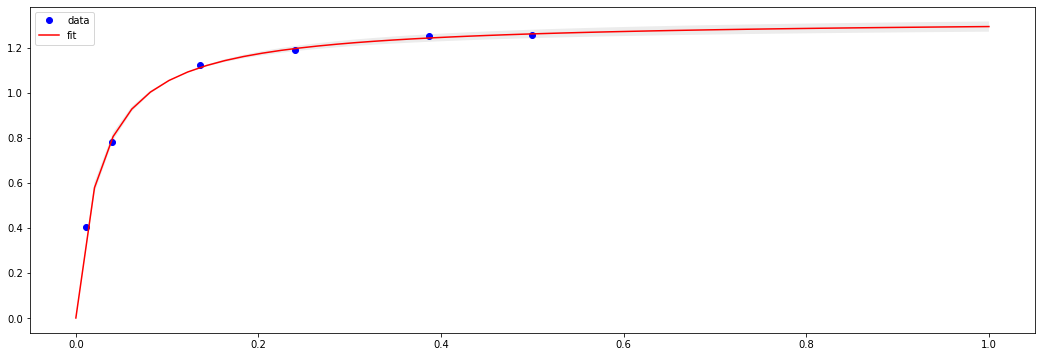

In [18]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
ax.plot(x, y, 'bo')
xfit = np.linspace(0, 1)
yfit = func(xfit, pars[0], pars[1])
ax.plot(xfit, yfit, 'r-')
sigma_array = np.diag(pcov)**0.5
ylow = func(xfit, pars[0] - sigma_array[0]*tval, pars[1] - sigma_array[1]*tval)
yhigh = func(xfit, pars[0] + sigma_array[0]*tval, pars[1] + sigma_array[1]*tval)
ax.fill_between(xfit, ylow, yhigh, facecolor='gray', alpha=.15)
ax.legend(['data','fit'], loc='best');
# ax.savefig('images/nonlin-curve-fit-ci.png')

y0 = 0.31711743995095726
yp = 5.887992076335035
K = 0.0125442230



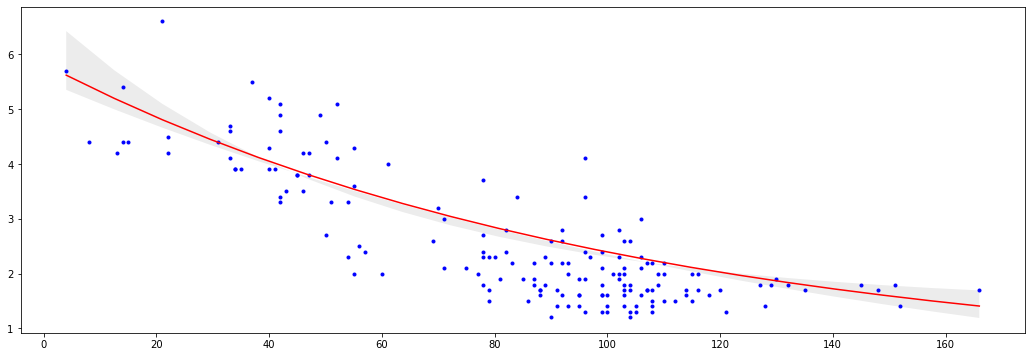

In [40]:

%run ../load_magic/storage.py

s = Storage()
female_enrollment_vs_fertility_df = s.load_object('female_enrollment_vs_fertility_df')
df = female_enrollment_vs_fertility_df.dropna()
x = np.array(df.Female_Enrollment.values)
X0 = x[0]
y = np.array(df.Fertility_Rate_2022.values)

smoothx = np.linspace(X0, x[-1], 20)

exp_decay = lambda x, y0, yp, k: y0 + (yp - y0) * np.exp(-k * (x-X0))

mask_series = (df.Female_Enrollment == df.Female_Enrollment.max())
guess_y0, guess_yp, guess_k = df[mask_series].Fertility_Rate_2022.squeeze(), 5.888027564425055, 0.0125446913
params, pcov = curve_fit(exp_decay, x, y, p0=[guess_y0, guess_yp, guess_k])

y0, yp, K = params

print(f'y0 = {y0}\nyp = {yp}\nK = {K:,.10f}\n')

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
ax.plot(x, y, 'b.')

# Add confidence intervals
sigma_array = np.diag(pcov)**0.5
tval = t.ppf(1.0-dd/2., max(0, len(y) - len(params)))

ylow = exp_decay(smoothx, params[0] - sigma_array[0]*tval, params[1] - sigma_array[1]*tval, params[2] - sigma_array[2]*tval)
yhigh = exp_decay(smoothx, params[0] + sigma_array[0]*tval, params[1] + sigma_array[1]*tval, params[2] + sigma_array[2]*tval)
ax.fill_between(smoothx, ylow, yhigh, facecolor='gray', alpha=.15)

# Why is this not in the middle of the confidence intervals?
yfit = exp_decay(smoothx, params[0], params[1] - sigma_array[1]*tval/2, params[2] - sigma_array[2]*tval/2)
ax.plot(smoothx, yfit, 'r-');

0.002778541980769226